In [ ]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 216.2 kB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# load the dataset and show first 5 rows

df = pd.read_csv('D:/ABDUL/AirBNBReviews.csv')
df.head()


,Genre,Review,Positive or Negative
0,Location,"The location of this Airbnb was perfect, close...",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding,...",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated...,1.0
3,Security,I felt completely safe and secure during my st...,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like...",1.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 341 non-null    object 
 1   Review                341 non-null    object 
 2   Positive or Negative  341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


In [ ]:
Here, I am going to provide an overview of the frequency of different genres in the dataset.

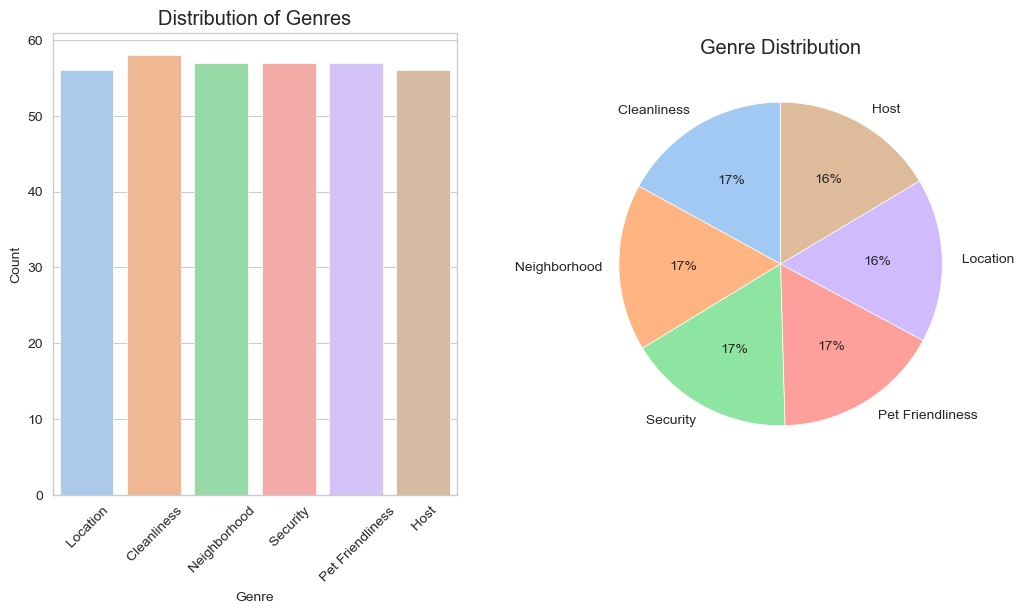

In [33]:
# Set the plot style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.countplot(x='Genre', data=df, ax=axes[0])
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Genres')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the pie chart on the second subplot
genre_counts = df['Genre'].value_counts()
axes[1].pie(genre_counts, labels=genre_counts.index, autopct='%.0f%%', startangle=90)
axes[1].set_title('Genre Distribution')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

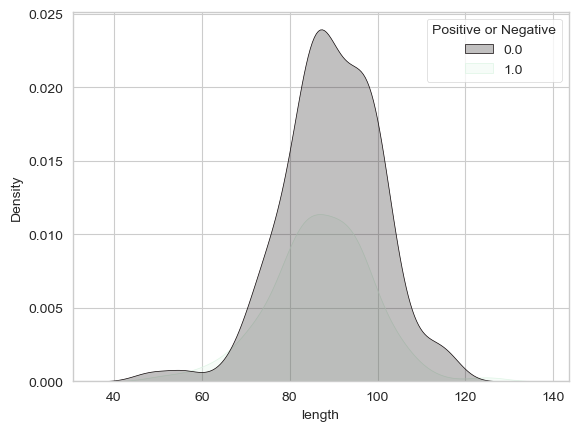

In [34]:
# Calculate the length of each review
df['length'] = df['Review'].apply(len)

# Create a KDE plot
sns.kdeplot(data=df, x='length', hue='Positive or Negative', palette='mako', fill=True)

# Display the plot
plt.show()

In [37]:
df['length'].describe()

count    354.000000
mean      85.477401
std       19.580033
min        3.000000
25%       81.000000
50%       88.000000
75%       96.000000
max      125.000000
Name: length, dtype: float64

In [34]:
df['Review'].value_counts()

There were safety concerns in the neighborhood, making me feel uneasy during my stay.                  5
Unfortunately, the Airbnb did not allow pets, which was disappointing for a pet owner like me.         3
Unfortunately, the Airbnb did not allow pets, which was disappointing as a pet owner.                  3
The neighborhood had a low crime rate, contributing to a sense of security throughout my visit.        2
I enjoyed the local cafes and restaurants in the charming neighborhood surrounding the Airbnb.         2
                                                                                                      ..
Unfortunately, the neighborhood had limited dining options and amenities.                              1
The Airbnb was located in a noisy neighborhood with constant traffic and construction noise.           1
I felt uncomfortable walking around the neighborhood at night due to safety concerns.                  1
The neighborhood lacked green spaces and parks, making 

Stemmer

Stemming is a technique used to reduce words to their base or root form, enabling different variations of the same word to be treated as one. It helps in simplifying the analysis of text data by grouping similar words together.

In [52]:
all_words = [word for review in df['Review'] if isinstance(review, str) for word in review.split()]
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
print(common_words)

[('the', 276), ('and', 204), ('The', 168), ('was', 153), ('Airbnb', 141), ('of', 125), ('a', 114), ('I', 104), ('my', 103), ('in', 100)]


Positive and Negative Keywords:

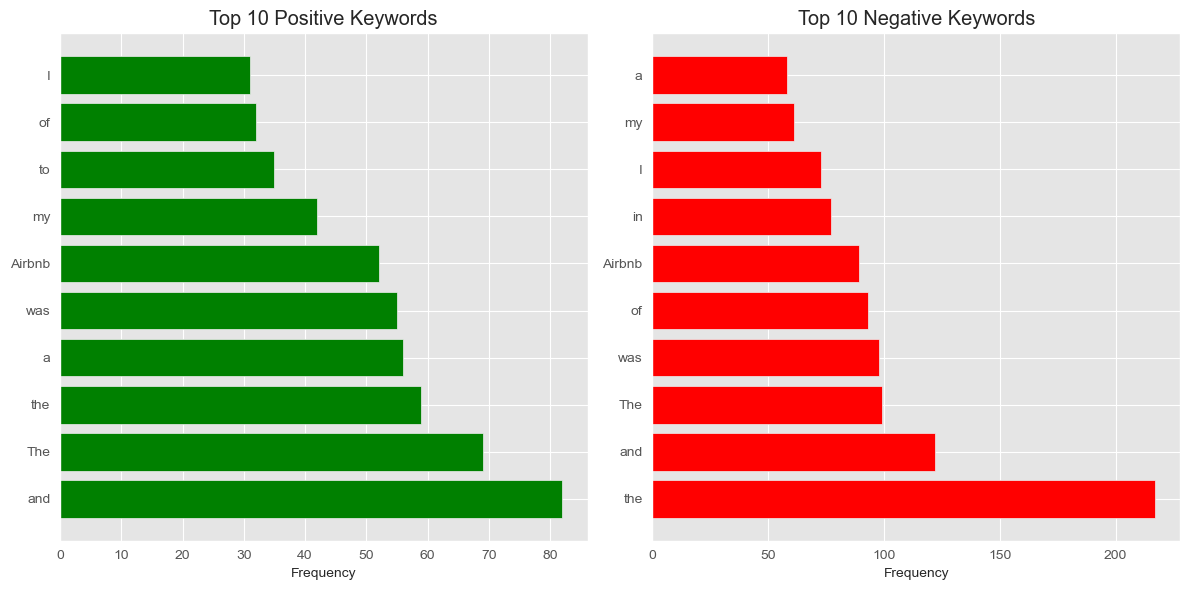

In [46]:
import matplotlib.pyplot as plt
from collections import Counter

positive_reviews = df[df['Positive or Negative'] == 1]['Review']
negative_reviews = df[df['Positive or Negative'] == 0]['Review']

positive_words = [word for review in positive_reviews if isinstance(review, str) for word in review.split()]
negative_words = [word for review in negative_reviews if isinstance(review, str) for word in review.split()]

positive_freq = Counter(positive_words)
negative_freq = Counter(negative_words)

positive_keywords = positive_freq.most_common(10)
negative_keywords = negative_freq.most_common(10)

# Extract the keywords and their frequencies
positive_words, positive_counts = zip(*positive_keywords)
negative_words, negative_counts = zip(*negative_keywords)

# Plot the bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Positive keywords bar plot
ax1.barh(range(len(positive_words)), positive_counts, align='center', color='green')
ax1.set_yticks(range(len(positive_words)))
ax1.set_yticklabels(positive_words)
ax1.set_xlabel('Frequency')
ax1.set_title('Top 10 Positive Keywords')

# Negative keywords bar plot
ax2.barh(range(len(negative_words)), negative_counts, align='center', color='red')
ax2.set_yticks(range(len(negative_words)))
ax2.set_yticklabels(negative_words)
ax2.set_xlabel('Frequency')
ax2.set_title('Top 10 Negative Keywords')

plt.tight_layout()
plt.show()

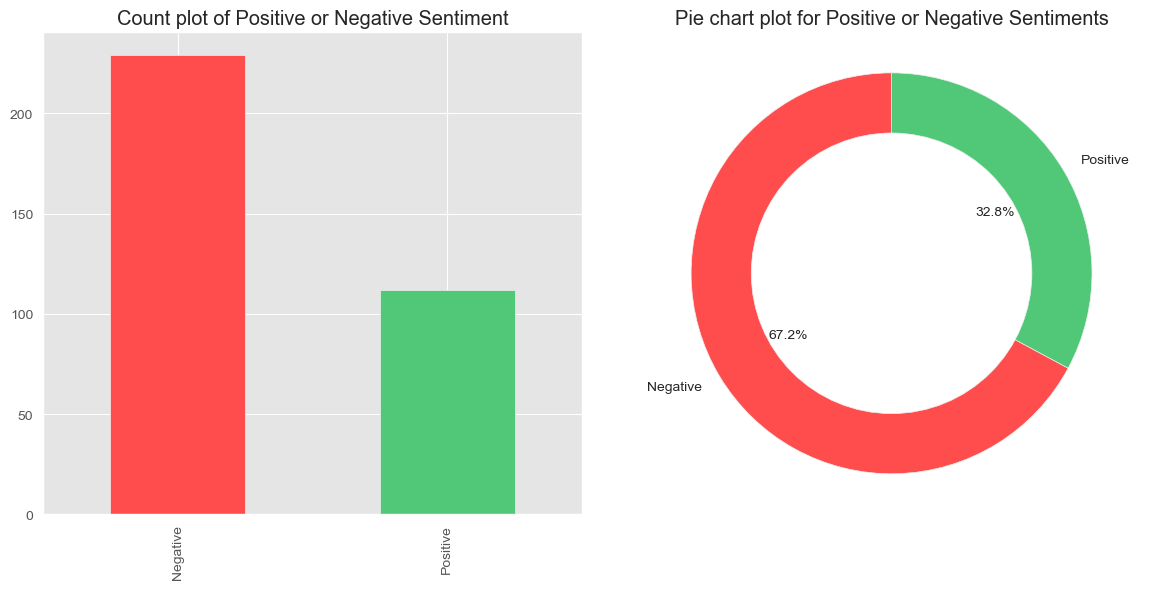

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#FF4C4C', '#50C878']
labels = ['Negative', 'Positive']
df['Positive or Negative'].value_counts().set_axis(labels)\
    .plot(kind='bar', title='Count plot of Positive or Negative Sentiment', color=colors, ax=ax1)

# Pie chart
sizes = df['Positive or Negative'].value_counts().to_list()

ax2.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax2.axis('equal') 
ax2.set_title("Pie chart plot for Positive or Negative Sentiments")

plt.tight_layout()
plt.show()

N-grams:

In [51]:
n = 3  # Change 'n' to the desired number of words in the n-gram

all_ngrams = [gram for review in df['Review'] if isinstance(review, str) for gram in ngrams(review.split(), n)]
ngram_freq = Counter(all_ngrams)
common_ngrams = ngram_freq.most_common(10)
print(common_ngrams)

[(('the', 'Airbnb', 'was'), 40), (('of', 'the', 'Airbnb'), 30), (('cleanliness', 'of', 'the'), 25), (('The', 'Airbnb', 'was'), 22), (('The', 'neighborhood', 'had'), 18), (('The', 'host', 'was'), 17), (('during', 'my', 'stay.'), 16), (('The', 'cleanliness', 'of'), 15), (('a', 'lack', 'of'), 15), (('Unfortunately,', 'the', 'Airbnb'), 14)]


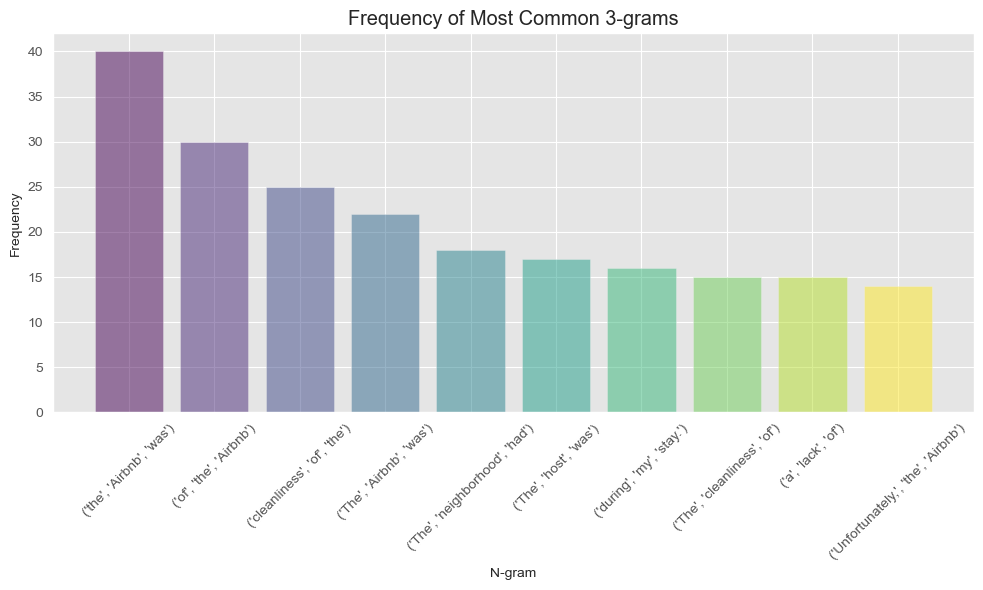

In [42]:
from nltk import ngrams
from collections import Counter

n = 3  # Change 'n' to the desired number of words in the n-gram

all_ngrams = [gram for review in df['Review'] if isinstance(review, str) for gram in ngrams(review.split(), n)]
ngram_freq = Counter(all_ngrams)
common_ngrams = ngram_freq.most_common(10)

# Extract the n-grams and their frequencies
ngrams, frequencies = zip(*common_ngrams)

# Generate unique colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(ngrams)))  # You can change the colormap to any other supported by Matplotlib

# Plot the bar graph with deep and sharp colors for each bar
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = range(len(ngrams))

# Plotting n-gram frequencies with deep and sharp colors
ax.bar(x_pos, frequencies, align='center', alpha=0.5, color=colors)
ax.set_xticks(x_pos)
ax.set_xticklabels(ngrams, rotation=45)
ax.set_xlabel('N-gram')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Most Common {}-grams'.format(n))

plt.tight_layout()
plt.show()

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert reviews to strings
df['Review'] = df['Review'].astype(str)

# Calculate sentiment scores for each review
df['SentimentScore'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculate the mean sentiment score for each genre
genre_ratings = df.groupby('Genre')['SentimentScore'].mean()

print(genre_ratings)

Genre
 Cleanliness        -0.016812
 Host               -0.023668
 Location            0.036857
 Neighborhood        0.163968
 Pet Friendliness   -0.024507
 Security            0.168607
Name: SentimentScore, dtype: float64


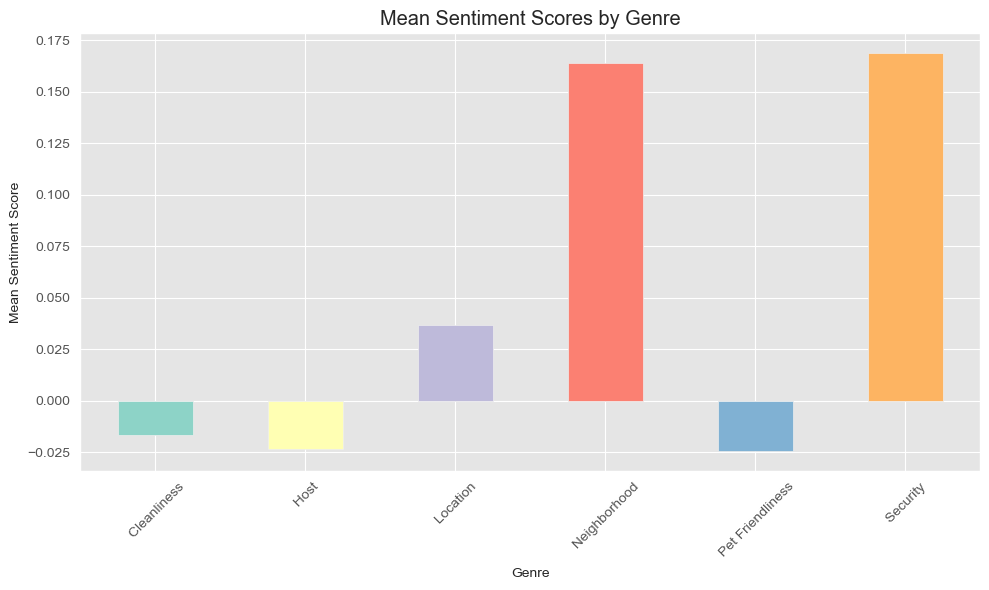

In [40]:
# Define the color palette
color_palette = sns.color_palette('Set3')

# Plotting the graph
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar', color=color_palette)

# Customize the plot
plt.title('Mean Sentiment Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

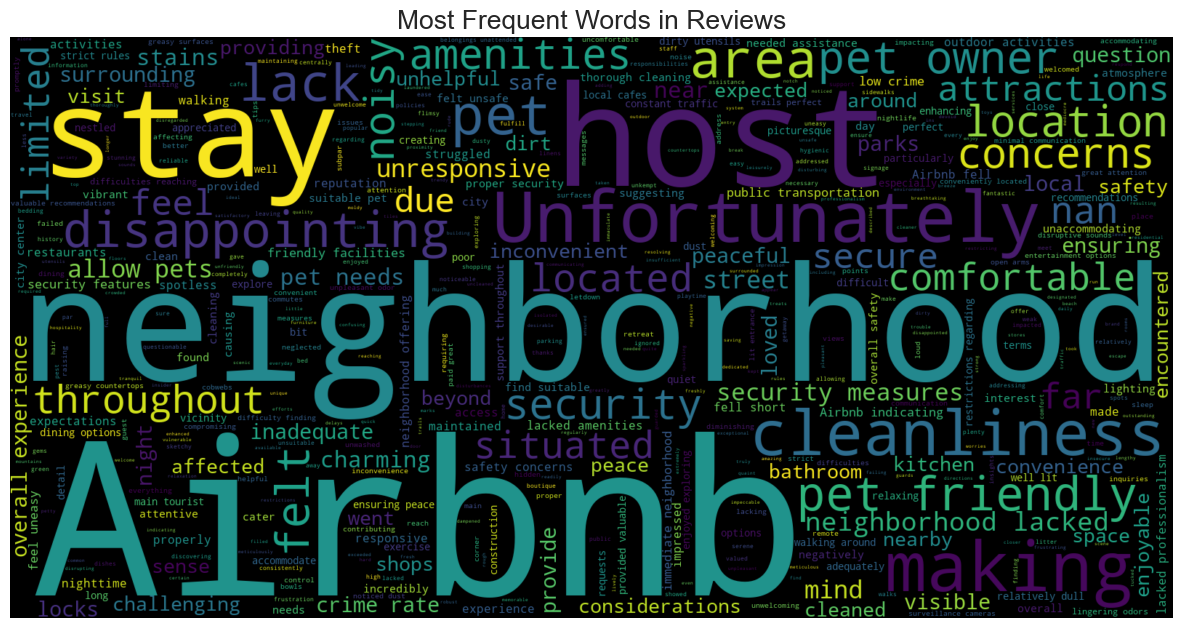

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all reviews into a single string
text = ' '.join([word for word in df['Review']])

# Generate the word cloud
plt.figure(figsize=(15, 10), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews', fontsize=19)
plt.show()

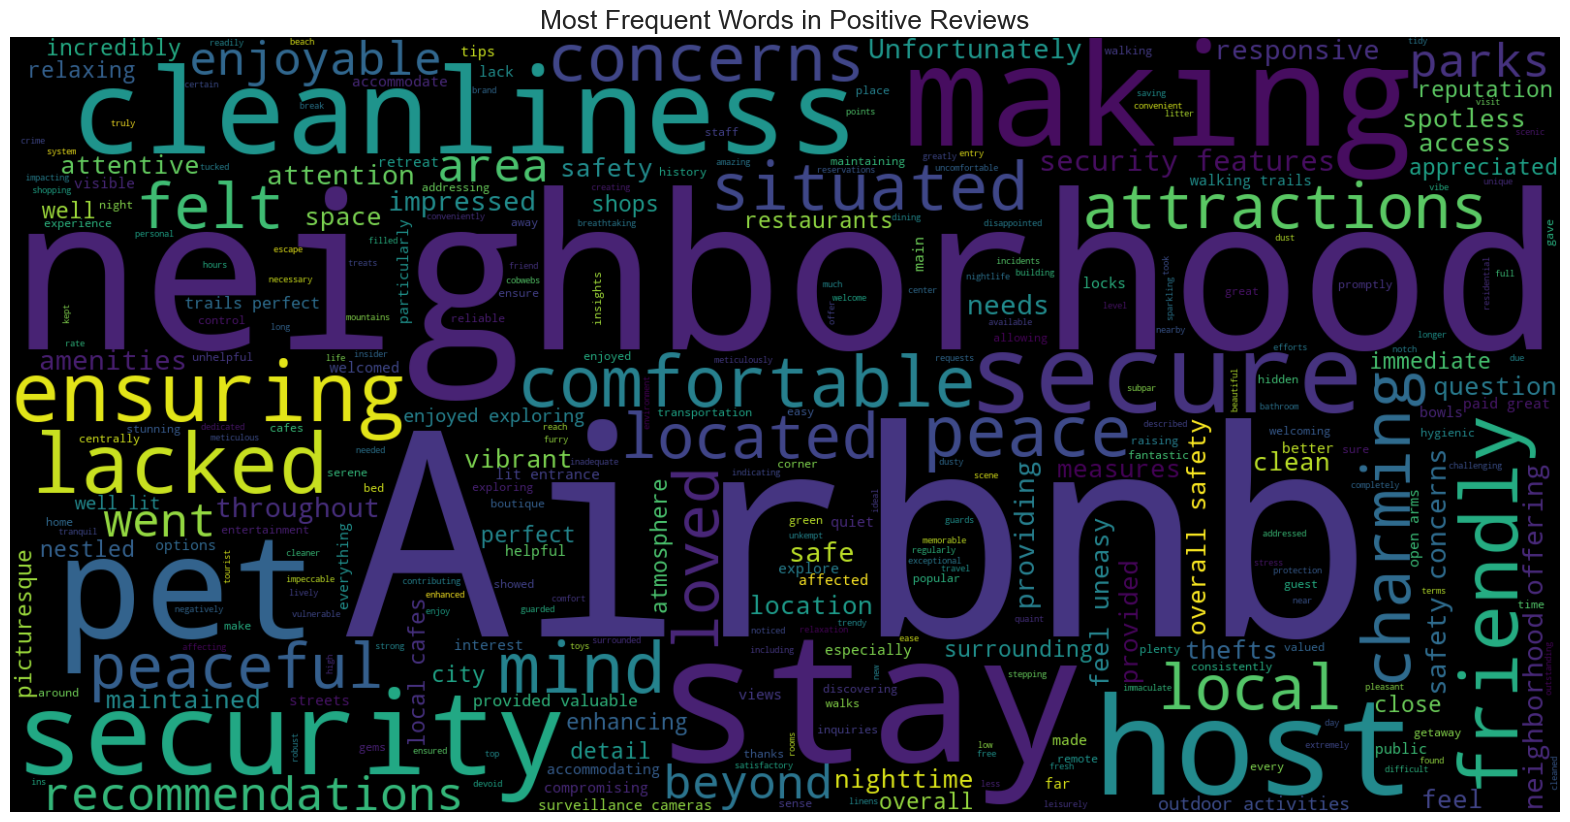

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all positive reviews into a single string
text = ' '.join([word for word in df[df['SentimentScore'] > 0]['Review']])

# Generate the word cloud
plt.figure(figsize=(20, 15), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews', fontsize=19)
plt.show()

**Classification & Prediction**

Here, the text data is transformed into numerical feature vectors using CountVectorizer, and then the data is split into training and test sets for machine learning model evaluation.

CountVectorizer is a technique used to create a vocabulary by collecting all the unique tokens from the tokenized text. Each token is assigned a unique index in the vocabulary.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assign X and Y variables
X = df['Review']
Y = df['Genre']

# Vectorize the text data using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

Size of x_train: (283, 567)
Size of y_train: (283,)
Size of x_test: (71, 567)
Size of y_test: (71,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (Example: Removing rows with missing values)
df = df.dropna()

# Assign X and Y variables
X = df['Review']
Y = df['Genre']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Vectorize the text data
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

# Create an instance of Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict on the test data
logreg_pred = logreg.predict(x_test)

# Calculate the accuracy of the model
logreg_acc = accuracy_score(y_test, logreg_pred)

# Print the test accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc * 100))

Genre                   13
Review                   0
Positive or Negative    13
Review_Length            0
SentimentScore           0
dtype: int64
Test accuracy: 88.41%


In [94]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test data
logreg_pred = logreg.predict(x_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))
print("\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, logreg_pred))

Confusion Matrix:
[[ 8  3  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0  1 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  1  2  0 13]]


Classification Report:
                   precision    recall  f1-score   support

      Cleanliness       1.00      0.73      0.84        11
             Host       0.79      1.00      0.88        11
         Location       0.78      0.88      0.82         8
     Neighborhood       0.77      0.91      0.83        11
 Pet Friendliness       1.00      1.00      1.00        12
         Security       1.00      0.81      0.90        16

         accuracy                           0.88        69
        macro avg       0.89      0.89      0.88        69
     weighted avg       0.90      0.88      0.88        69



__MultinomiaNB__

In [95]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(x_train, y_train)

# Predict on the test data
mnb_pred = mnb.predict(x_test)

# Calculate the accuracy of the model
mnb_acc = accuracy_score(y_test, mnb_pred)

# Print the test accuracy
print("Test accuracy: {:.2f}%".format(mnb_acc * 100))

Test accuracy: 88.41%


In [96]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(y_test, mnb_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, mnb_pred))

Confusion Matrix:
[[ 9  2  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0  1 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  1  2  0 13]]


Classification Report:
                   precision    recall  f1-score   support

      Cleanliness       1.00      0.82      0.90        11
             Host       0.85      1.00      0.92        11
         Location       0.75      0.75      0.75         8
     Neighborhood       0.71      0.91      0.80        11
 Pet Friendliness       1.00      1.00      1.00        12
         Security       1.00      0.81      0.90        16

         accuracy                           0.88        69
        macro avg       0.89      0.88      0.88        69
     weighted avg       0.90      0.88      0.89        69

